# Create updated image database to account for bugs in previous version

Friday, May 11, 2018

In [1]:
import numpy as np
import pandas as pd
import imagehash
from keras.preprocessing import image

Using TensorFlow backend.


In [2]:
%load_ext autoreload
%autoreload 2

In [12]:
import os
import sys

project_directory = '../..'
project_path = os.path.abspath(os.path.join(project_directory))
if project_path not in sys.path:
    sys.path.append(project_path)

In [14]:
from src.image_manager import ImageManager

## Create an ImageManager from scratch, and sync to create a new database

In [13]:
photo_directory = os.path.join(project_path, 'tree_photos/')
photo_directory

'/Users/ndbs/tree-logic/tree_photos/'

In [129]:
manager = ImageManager(photo_directory)

In [130]:
manager.sync_images()

In [131]:
manager.syncs_df

,time_started,time_completed,folders
0,2018-05-11 18:13:24.261373,2018-05-11 18:14:10.044293,"['acer_macrophyllum', 'betula_pendula', 'thuja..."


In [132]:
manager.image_df.head()

,p_hash,filename,folder,time_added,time_verified
0,9bb759cb29b01a25,image_bigleaf_maple_57.png,acer_macrophyllum,2018-05-11 18:13:24.267713,2018-05-11 18:13:24.267713
1,99c20b3b74d53de0,image_bigleaf_maple_43.png,acer_macrophyllum,2018-05-11 18:13:24.276322,2018-05-11 18:13:24.276322
2,a1e1e0d4e646e765,image_big_leaf_maple_bark_48.png,acer_macrophyllum,2018-05-11 18:13:24.284686,2018-05-11 18:13:24.284686
3,abee94c19cb28b0e,image_acer_macrophylum_tree_49.png,acer_macrophyllum,2018-05-11 18:13:24.292620,2018-05-11 18:13:24.292620
4,d3c161631f2b4b4e,image_bigleaf_maple_94.png,acer_macrophyllum,2018-05-11 18:13:24.298834,2018-05-11 18:13:24.298834


In [133]:
manager.image_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5720 entries, 0 to 5719
Data columns (total 5 columns):
p_hash           5720 non-null object
filename         5720 non-null object
folder           5720 non-null object
time_added       5720 non-null datetime64[ns]
time_verified    5720 non-null datetime64[ns]
dtypes: datetime64[ns](2), object(3)
memory usage: 268.1+ KB


## Find any duplicate hashes, and manually verify that these are actually duplicate images

Note: There are still duplicates even though I previously removed duplicates, because of the bug in my ImageScraper code that caused images to be stored in the dataframe with the wrong hash. Moreover, because of this bug, it looks like I deleted some images completely when there was no duplicate copy, because the manager thought there was a duplicate when there actually wasn't.

In [134]:
manager.get_duplicates()

{array([[ True,  True, False, False,  True, False,  True, False],
        [False, False,  True,  True,  True, False,  True,  True],
        [False, False,  True, False, False,  True, False,  True],
        [False, False, False, False,  True, False,  True,  True],
        [False,  True,  True, False,  True, False,  True, False],
        [ True,  True, False, False,  True, False,  True,  True],
        [ True, False, False,  True, False,  True,  True,  True],
        [ True,  True, False, False, False,  True, False, False]], dtype=bool): ['/Users/ndbs/tree-logic/tree_photos/betula_pendula/image_betula_pendula_704.png',
  '/Users/ndbs/tree-logic/tree_photos/betula_pendula/image_betula_pendula_668.png'],
 array([[ True,  True, False, False, False,  True,  True, False],
        [False,  True, False, False, False,  True,  True, False],
        [False, False, False,  True,  True,  True,  True, False],
        [ True, False, False, False,  True, False,  True,  True],
        [False,  True, Fal

In [135]:
len(manager.get_duplicates())

22

In [219]:
duplicate_list = [x for x in manager.get_duplicates().values()]
duplicate_list

[['/Users/ndbs/tree-logic/tree_photos/betula_pendula/image_betula_pendula_704.png',
  '/Users/ndbs/tree-logic/tree_photos/betula_pendula/image_betula_pendula_668.png'],
 ['/Users/ndbs/tree-logic/tree_photos/betula_pendula/image_betula_pendula_658.png',
  '/Users/ndbs/tree-logic/tree_photos/betula_pendula/image_betula_pendula_745.png'],
 ['/Users/ndbs/tree-logic/tree_photos/betula_pendula/image_betula_pendula_670.png',
  '/Users/ndbs/tree-logic/tree_photos/betula_pendula/image_betula_pendula_706.png'],
 ['/Users/ndbs/tree-logic/tree_photos/betula_pendula/image_betula_pendula_665.png',
  '/Users/ndbs/tree-logic/tree_photos/betula_pendula/image_betula_pendula_701.png'],
 ['/Users/ndbs/tree-logic/tree_photos/betula_pendula/image_betula_pendula_671.png',
  '/Users/ndbs/tree-logic/tree_photos/betula_pendula/image_betula_pendula_708.png'],
 ['/Users/ndbs/tree-logic/tree_photos/betula_pendula/image_betula_pendula_705.png',
  '/Users/ndbs/tree-logic/tree_photos/betula_pendula/image_betula_pendu

In [137]:
def generate_images_from_paths(img_paths):
    return (image.load_img(path, target_size=(299,299)) for path in img_paths)

In [237]:
duplicates = generate_images_from_paths(duplicate_list[0])
duplicates

<generator object generate_images_from_paths.<locals>.<genexpr> at 0x11a8e1b48>

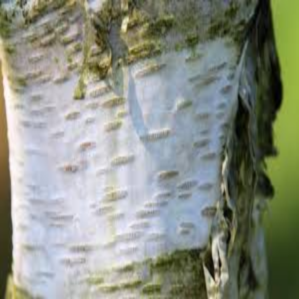

In [238]:
next(duplicates)

## Check that everything seems in order, and remove duplicate images

In [239]:
manager.image_df['filename'].describe()

count                             5720
unique                            5720
top       image_betula_pendula_342.png
freq                                 1
Name: filename, dtype: object

In [240]:
manager.image_df['p_hash'].describe()

count                 5720
unique                5720
top       95b40a79c636e34e
freq                     1
Name: p_hash, dtype: object

In [241]:
manager.remove_duplicates()

In [242]:
manager.get_duplicates()

{}

In [243]:
manager.image_df['filename'].describe()

count                             5720
unique                            5720
top       image_betula_pendula_342.png
freq                                 1
Name: filename, dtype: object

## Export the new dataframe and syncs log to the data folder

In [246]:
!ls ../..

LICENSE     __pycache__ notebooks   tree_photos
README.md   data        src         web


In [248]:
!ls ../../data

gb_confusion.png         image_log_20180205.csv   tree_image_info.csv
gb_model_jan30.pkl       image_syncs_20180204.csv tree_images.csv
image_log_20180204.csv   image_syncs_20180205.csv


In [249]:
image_df_path = os.path.join(project_path, 'data', 'image_log_20180511.csv')
syncs_df_path = os.path.join(project_path, 'data', 'image_syncs_20180511.csv')

manager.export_logs(image_df_path, syncs_df_path)

In [251]:
!ls -l ../../data

total 85400
-rw-r--r--  1 ndbs  staff     25651 Feb  7 16:01 gb_confusion.png
-rw-r--r--  1 ndbs  staff   3105147 Feb  1 16:44 gb_model_jan30.pkl
-rw-r--r--  1 ndbs  staff    488281 Feb  5 00:30 image_log_20180204.csv
-rw-r--r--  1 ndbs  staff    711665 Feb  5 22:03 image_log_20180205.csv
-rw-r--r--  1 ndbs  staff    707031 May 11 18:34 image_log_20180511.csv
-rw-r--r--  1 ndbs  staff       141 Feb  4 22:51 image_syncs_20180204.csv
-rw-r--r--  1 ndbs  staff       427 Feb  5 22:03 image_syncs_20180205.csv
-rw-r--r--  1 ndbs  staff       324 May 11 18:34 image_syncs_20180511.csv
-rw-r--r--  1 ndbs  staff     74715 Jan 30 12:03 tree_image_info.csv
-rw-r--r--  1 ndbs  staff  37792669 Jan 30 11:46 tree_images.csv
